In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.interpolate import griddata
import math

In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_c

In [3]:
RawData = "rawdata/probeEnv2.data"
f = open(RawData, "r")
a = np.fromfile(f, dtype=np.uint32)
t = a[-1]
V = a[:-1].copy()
T = [ (( x * t ) / ( 1000.0*len(V) )) for x in range(2*len(V))]
Fech = 1000.0*len(V)/t # in MHz

In [4]:
Fech = 1000.0*len(V)/t # in MHz
print Fech

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(Fech)? (<ipython-input-4-3a69bbb1b2bd>, line 2)

In [ ]:
#ADC1_pins = [21,22,19,15,13,11,12,10, 8]
ADC1_pins = [21,22,19,15,13,11,12,10, 8]
ADC2_pins = [38,37,36,35,33,32,26,24,23]

#ADC1_GPIO = [9, 25,10,22,27,17,18,15,14]
ADC1_GPIO =  [9 ,25,10,22,27,17,18,15,14]

ADC2_GPIO = [20,26,16,19,13,12, 7, 8,11]

ADC1len = len(ADC1_GPIO)
ADC2len = len(ADC2_GPIO)


def GetV2(Volts):
    Signal = []
    Map = np.zeros((len(V),ADC2len), dtype=np.int)
    for i in range(len(Volts)):
        val = int(V[i])
        SignalZero = 0
        for k in range(ADC2len):
            Map[i][k] = (val & 2**k)/2**k
        for k in range(ADC2len):
            SignalZero += 2**k*((val & 2**ADC2_GPIO[k])/2**ADC2_GPIO[k])
        Signal.append(SignalZero)

            
    return Signal,Map



def GetV1(Volts):
    Signal = []
    Map = np.zeros((len(V),ADC1len), dtype=np.int)
    for i in range(len(Volts)):
        val = int(V[i])
        SignalZero = 0
        for k in range(ADC1len):
            Map[i][k] = (val & 2**k)/2**k
        for k in range(ADC1len):
            SignalZero += 2**k*((val & 2**ADC1_GPIO[k])/2**ADC1_GPIO[k])
        Signal.append(SignalZero)

            
    return Signal,Map

In [ ]:
M = GetV2(V)[0]
M2 = GetV1(V)[0]
Ma = M - np.average(M[5000:7000])
Mb = M2 - np.average(M2[5000:7000])

In [ ]:
tt = 170*5000
plt.figure(figsize=(15,5))
plt.plot(T[tt+0:tt+15000],Ma[tt+0:tt+15000],"r")
plt.plot(T[tt+0:tt+15000],Mb[tt+0:tt+15000],"b")
plt.title("Plots "+RawData+' .')  
plt.show()

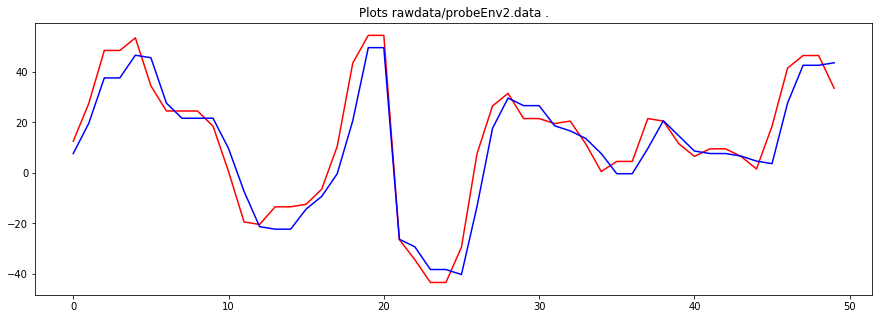

In [7]:
plt.figure(figsize=(15,5))
plt.plot(Ma[900:950],"r")
plt.plot(Mb[900:950],"b")
plt.title("Plots "+RawData+' .')  
plt.show()

In [8]:
rawSig = []
for k in range(len(Ma)):
    rawSig.append(Mb[k])
    rawSig.append(Ma[k])
rawSig = rawSig - min(rawSig)

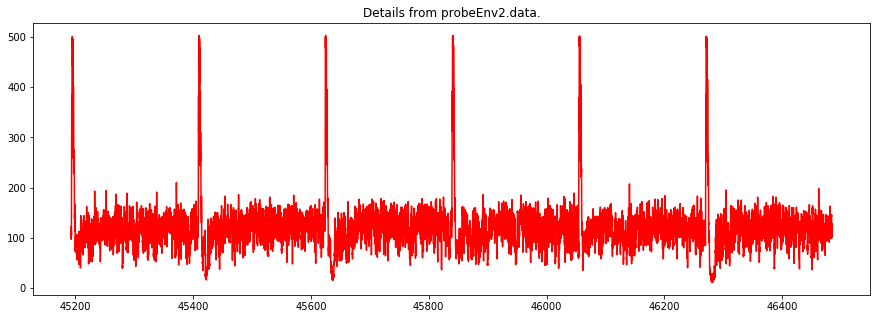

In [9]:
tt = 210*2500
plt.figure(figsize=(15,5))
TT = np.divide(T,2.0)
plt.plot(TT[2*tt:2*tt+2*15000],rawSig[2*tt:2*tt+2*15000],"r")
plt.title("Details from "+RawData.split("/")[-1]+".")  
#plt.savefig('datas_'+RawData.split("/")[-1]+'.jpg', bbox_inches='tight')
plt.show()

In [10]:
tableData = np.asarray(rawSig).reshape((1000,2*2500))

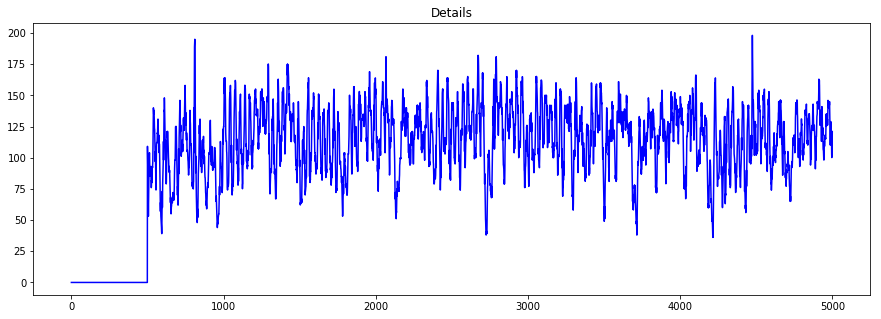

In [11]:
for k in range(500):
    for l in range(1000):
        tableData[l][k] = 0
ExLine = tableData[215]
plt.figure(figsize=(15,5))
plt.plot(ExLine[0:5000],"b")
plt.title("Details")  
plt.show()

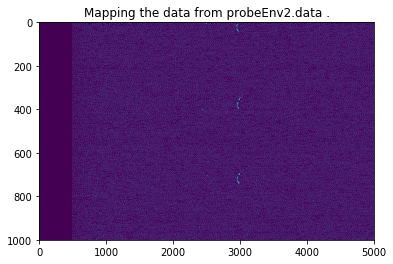

In [12]:
plt.imshow((abs(tableData))**2, aspect='auto')
plt.title("Mapping the data from "+RawData.split("/")[-1]+" .")  
plt.savefig('map_'+RawData.split("/")[-1]+".jpg", bbox_inches='tight')
plt.show()

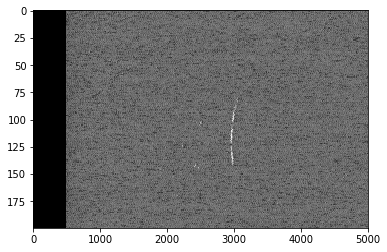

In [15]:
Start =600
Stop = 800
data  = tableData[Start:Stop]
TmpImg = (abs(data))**0.7
plt.imshow(TmpImg,cmap=plt.get_cmap('gray'), aspect='auto')
plt.savefig('mapCleanImage_'+RawData.split("/")[-1]+str(Start)+"-"+str(Stop)+".jpg", bbox_inches='tight')
plt.show()

In [56]:
FFTdata = np.fft.fft(rawSig)
ff = [ Fech*2.0*x/(2*len(V)) for x in range(len(V))]
for k in range(len(V)):
    if (k < 500000/5 or k > 0.6*1000000):
        FFTdata[k] = 0
        FFTdata[-k] = 0


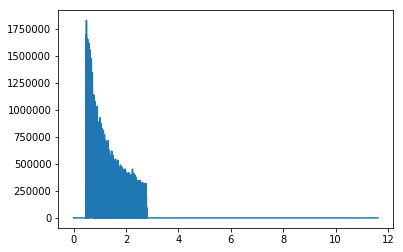

In [57]:
plt.plot(ff,abs(FFTdata[0:len(FFTdata)/2]))
plt.show()

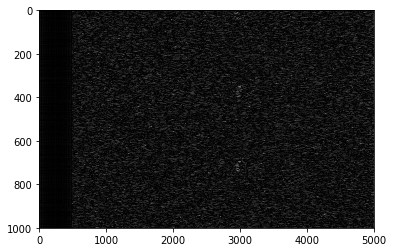

In [58]:
ifft = abs(np.fft.ifft(FFTdata))
tableDataifft = np.asarray(ifft).reshape((1000,2*2500))
plt.imshow(tableDataifft,cmap=plt.get_cmap('gray'), aspect='auto')
plt.show()